# Simulating a 2D Ising Model with Monte Carlo Method

### Sumer Malhotra (3035347457) | Olivia Jackson (3035653399) 
### Saad Mohiuddin (3035492989) | Patrick Li (3035654795)

## Importing Libraries

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from random import *
import timeit
#run time calculation feature added.

## User-defined Functions

In [55]:
def spinGenerator():
    x = random()
    if x > 0.5:
        return 1
    return -1


def generateLattice(dimensions):
    return np.array([[spinGenerator() for i in range(dimensions)] for j in range(dimensions)])

def energy(lattice, n):
    energy=0
    for x in range(0, n):
        for y in range(0, n):
            energy += lattice[x,y] * nsum(x, y, lattice)
    return -energy/2

def magnetization(lattice, n):
    return np.sum(lattice)/(n**2)

def nsum(x, y, lattice):
    vals = [-1, 1]
    sum = 0
    for i in vals:
        if (x+i) % len(lattice) == 0 and (x+i) != 0:
            x1 = 0
        else:
            x1 = x+i
        if (y+i) % len(lattice) == 0 and (y+i) != 0:
            y1 = 0
        else:
            y1 = y+i
        sum += lattice[x1][y] + lattice[x][y1]
    return sum

average_E = [[]]
average_m = [[]]
Esquared = [[]]
msquared = [[]]
rescale_E = [[]]

T_list = list(np.linspace(T_min, T_max, num=temp_iterations) )

## Simulation of the lattice at a Temperature, T

4
0.1
0.13277310924369748
0.16554621848739498
0.19831932773109245
0.23109243697478993
0.2638655462184874
0.29663865546218493
0.3294117647058824
0.3621848739495799
0.39495798319327735
0.4277310924369748
0.4605042016806723
0.49327731092436977
0.5260504201680672
0.5588235294117647
0.5915966386554622
0.6243697478991597
0.6571428571428571
0.6899159663865546
0.7226890756302521
0.7554621848739496
0.788235294117647
0.8210084033613445
0.853781512605042
0.8865546218487396
0.919327731092437
0.9521008403361345
0.984873949579832
1.0176470588235296
1.050420168067227
1.0831932773109245
1.1159663865546219
1.1487394957983195
1.181512605042017
1.2142857142857144
1.247058823529412
1.2798319327731094
1.312605042016807
1.3453781512605043
1.378151260504202
1.4109243697478993
1.4436974789915968
1.4764705882352942
1.5092436974789918
1.5420168067226891
1.5747899159663867
1.607563025210084
1.6403361344537817
1.6731092436974793
1.7058823529411766
1.7386554621848742
1.7714285714285716
1.8042016806722692
1.8369747

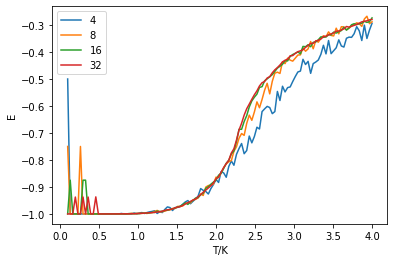

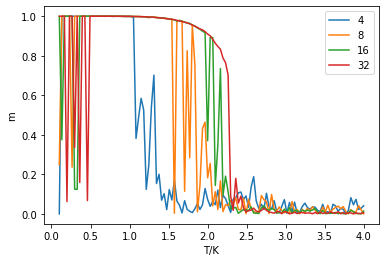

In [56]:
def run():
    
    samplerate = int(1E7)
    #this means sample the m&E at the moment for every 'samplerate' iteration
    operation = int(3E7)
    iteration = range(operation)
    #the total iteration for one temperature
    alpha = 0.999
    #the portion of the data at the end of each cycle with particular T for the calculation of average m&E
    temp_iterations = 120
     #taking more datapoints near the critical temperature.
    #the number of temperature assess in the programme
    T_max = 4
    T_min = 0.1          #this cannot be zero
    T_list = list(np.linspace(T_min, T_max, num=temp_iterations) )
    
    
    data_min = round((1 - alpha) * len(iteration))
    data_max = round((len(iteration)))
    #calculate the upper and lower bound of the sampling range

    #specify the maximum and minimum temperature and construct the list of temperature
    
    for d in range(1):
        dim = 2**(d+5)
        print(dim)
        T_values = []
        

        for i in range(len(T_list)):

            T = T_list[i]
            #get the temperature from pre-constructed list
    
            m = 0
            E = 0
        
            #variable 'm', 'E' are used to sum all the data point m, E value
            
            j = 0
            #preset the samplerate counter
            k = 0
            #counter for the number of data point used to calculate the mean value
            
            
            
            Pro4 = np.exp(-4/T)
            Pro8 = np.exp(-8/T)
            #these two are the pobabilities of fliping the element when dE is 4 and 8
            
            

            lattice = generateLattice(dim)
            #generate Lattice for each temperature
            
            
            for i in iteration:
                x = randrange(0, dim)
                y = randrange(0, dim)
                target = (-1) * lattice[x, y]

                dEhalf = - nsum(x, y, lattice) * target
                #as when '-1' change to '1', the change of E is alway twice of the neighboring sum.

                if dEhalf <= 0:
                    lattice[x, y] = target
                elif dEhalf == 2:
                    if Pro4 > random():
                        lattice[x, y] = target
                        #when dE/2 equal to 2, use the probability of dE equal to 4, which is Pro4
                elif dEhalf == 4:
                    if Pro8 > random():
                        lattice[x, y] = target
                        #when dE/2 equal to 4, use the probability of dE equal to 8, which is Pro8
                        
                        
                if i > data_min and i < data_max:
                    j += 1
                    #bump up the samplerate counter
                    if j%samplerate==0:
                        #every 'samplerate' amout of iteration, collect the data
                        m += magnetization(lattice, dim)
                        E += energy(lattice, dim)
                        k += 1
                        #bump up the number of sample counter

            
            meanE = E/k
            meanm = m/k
            E2=E**2
            m2=m**2
            #taking average
            
            print(T)
            T_values.append(T)
            average_E[d].append(meanE)
            average_m[d].append(abs(meanm))
            e
            Esquared[d].append(E2)
            msquared[d].append(m2)
            #using the absolute value of m as it is expected to converge to either 1 or -1
            


            plt.plot(iteration, m)
            plt.show()
            #plt.plot(iteration, E, color='red')
            #plt.show()
            
        try:    
            rescale_E[d] = average_E[d]
            for i in range(len(average_E[d])):
                rescale_E[d][i] = float(average_E[d][i])/(2*dim**2)
            #rescale the total energy E with the maximum energy 2*32**2
         
            
            print('dim = '+ str(dim))
            print('average E graph')
            plt.figure(0)
            plt.plot(T_values, rescale_E[d], label=str(dim))
            plt.xlabel('T/K')
            plt.ylabel('E')
            plt.legend()



            print('dim = '+ str(dim))
            print('average m graph')
            plt.figure(1)
            plt.plot(T_values, average_m[d], label=str(dim))
            plt.legend()
            plt.xlabel('T/K')
            plt.ylabel('m')
        except:
            print('something went wrong')

        
        
start = timeit.default_timer()
run()
stop = timeit.default_timer()
#timer
print('Time: ', stop - start)

In [69]:
temp_iterations = 120
     #taking more datapoints near the critical temperature.
    #the number of temperature assess in the programme
T_max = 4
T_min = 0.1          #this cannot be zero
T_list = list(np.linspace(T_min, T_max, num=temp_iterations) )

np.savetxt("average_m[3].csv", np.array(average_m[3]), delimiter=",", fmt='%s', header='header')
np.savetxt("rescale_E[3].csv", np.array(rescale_E[3]), delimiter=",", fmt='%s', header='header')
np.savetxt("average_E[3].csv", np.array(average_E[3]), delimiter=",", fmt='%s', header='header')
np.savetxt("T2.csv", np.array(T_list), delimiter=",", fmt='%s', header='header')

In [1]:
#code for reading csv
'''
import pandas as pd


df = pd.read_csv('average_m.csv', delimiter=',',)

average_m=list(df['# header'])

print(len(average_m))

df2 = pd.read_csv('T.csv', delimiter=',')
T=list(df2['# header'])

df3 = pd.read_csv('rescale_E.csv', delimiter=',')
rescale_E=list(df3['# header'])

df4 = pd.read_csv('average_E.csv', delimiter=',')
average_E=list(df4['# header'])
'''

"\nimport pandas as pd\n\n\ndf = pd.read_csv('average_m.csv', delimiter=',',)\n\naverage_m=list(df['# header'])\n\nprint(len(average_m))\n\ndf2 = pd.read_csv('T.csv', delimiter=',')\nT=list(df2['# header'])\n\ndf3 = pd.read_csv('rescale_E.csv', delimiter=',')\nrescale_E=list(df3['# header'])\n\ndf4 = pd.read_csv('average_E.csv', delimiter=',')\naverage_E=list(df4['# header'])\n"